## 6. Write a program to perform the forecasting using AR(p) model. Then, calculate and report the Root Mean Squared Error (RMSE) for the forecasts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [2]:
df=pd.read_csv('daily_temperatures.csv',index_col=0,parse_dates=True)
X=df.values
print(df.shape)
print(df.head())

(3650, 1)
            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


<Axes: xlabel='Date'>

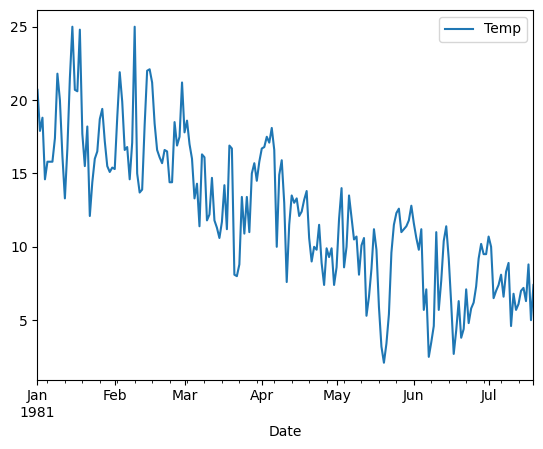

In [3]:
df[:200].plot()

In [4]:
from statsmodels.tsa.stattools import adfuller

dftest=adfuller(df['Temp'],autolag='AIC')
print("p-value = ",dftest[1])
if(dftest[1]>0.5):
    print("Time series is non-stationary")
else:
    print("Time series is stationary")

p-value =  0.0002470826300361156
Time series is stationary


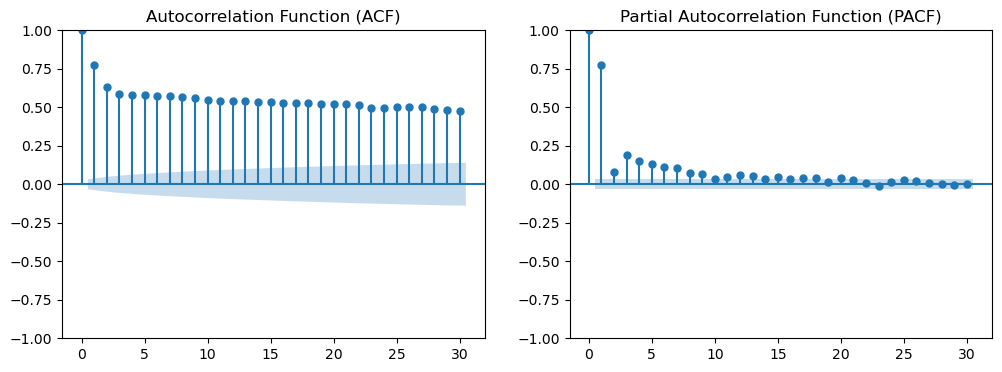

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(df['Temp'], lags=30, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

plot_pacf(df['Temp'], lags=30, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')
plt.show()

In [6]:
#AR(2)
train=X[:len(X)-21]
test=X[len(X)-21:]

In [7]:
model=AutoReg(train,lags=10).fit()

In [8]:
pred=model.predict(start=len(train),end=len(X)-1,dynamic=False)

[13.11725152 14.69694144 15.21841869 15.27257505 15.08077885 14.79255723
 14.38572826 14.06469104 13.85911734 13.79191055 13.8777024  13.94402767
 13.92503266 13.84322311 13.73716359 13.62988552 13.53324801 13.45545006
 13.39473355 13.34628363 13.30238301]


Text(0.5, 1.0, 'Daily temperature prediction using AR model')

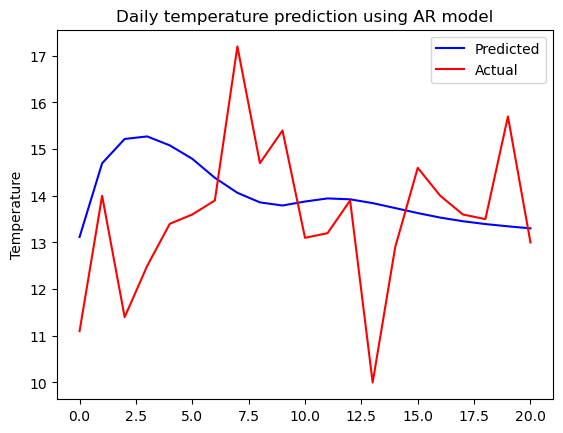

In [9]:
plt.plot(pred,label='Predicted', color='blue')
plt.plot(test,label='Actual', color='red')
print(pred)
plt.legend()
plt.ylabel('Temperature')
plt.title('Daily temperature prediction using AR model')

In [10]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))

In [11]:
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 1.7979017884714432
